# Deep Learning approach for single-cell RNA-seq data analysis

## Introduction
In the rapidly evolving field of bioinformatics, particularly in single-cell RNA sequencing, effective data handling and interpretation have risen to the forefront of research.<sup>1</sup> The gaining popularity of machine learning methodologies accompanies this rise. It has transformed the way we analyse and understand complex biological data. These advanced techniques can enhance the ability to handle these datasets and make more accurate and insightful discoveries in single-cell genomics.<sup>2</sup>
In this single-cell RNA sequencing data analysis, the objective is clear: to conduct a comparative analysis between two methodologies, Seurat and single-cell Variational Inference (scVI). Seurat is a well-established R-based package that has been the gold standard for single-cell data analysis. It offers robust linear modelling techniques for dimensionality reduction, batch correction, clustering, and visualisation.<sup>3</sup> Seurat is, however, limited by its linearity, assuming that relations between genes are strictly linear.<sup>4</sup> Linearity may not reflect the complexity between non-linear interactions, which is often the case in biological systems.<sup>5</sup> Because of these limitations, scVI will be tested as an alternative on a published dataset.<sup>6</sup>

## Seurat
Seurat, developed in 2015, has become one of the go-to R package tools for clustering, dimensionality reduction, and visualisation of single-cell RNA-seq data.<sup>3</sup> Its popularity is due to its user-friendly interface and the ability to process large datasets efficiently. The package offers a lot of functions for quality control, normalisation, and downstream analysis.<sup>7</sup>

## scVI
scVI, developed in 2018, is a new tool for clustering, dimensionality reduction, and visualisation of single-cell RNA-seq data.<sup>8</sup> The algorithm behind scVI is based on variational autoencoders (VAEs).<sup>8</sup> This technique reveals underlying patterns, provides new insights into the biology of individual cells and offers a unique perspective on the regulation of gene expression. Its deep learning capabilities hold the potential to uncover intricate cellular relationships and mechanisms which may not be highlighted when using a linear model.<sup>9</sup>  

## Autoencoders
An autoencoder is a type of neural network that’s used for unsupervised learning and dimensionality reduction.<sup>10</sup>  Autoencoders do not need exact labels for the training process. They generate their labels from the training process. Autoencoders are primarily utilised for data compression, feature learning and noise reduction. It consists of an encoder that compresses the input data into a lower dimensional representation(latent space) and a decoder that reconstructs this representation into the original input data. Autoencoders can find non-linear patterns in the data, which improves predictability and interpretability. 
<img src="static/autoencoders.png">

***Figure 1:** Overview of the encoder, latent space, and decoder parts of the variational autoencoder.<sup>13</sup> Every layer in the encoder and the decoder has a dense and multiple neurons.*

The encoder comprises a series of connected layers where each layer captures complex patterns, relationships, or characteristics compactly and efficiently. The input layer takes the raw input and prepares it for preprocessing. The layers between the input and output layers are called the hidden layers. The hidden layers of the encoder capture the higher-level features and patterns in the data. The output from the output layer goes into the latent space, also known as the bottleneck (see Figure 1). 

The latent space represents the abstract of the input data in a lower dimensionality. Every dimension within the latent space represents a specific feature or attribute acquired by the encoder. The output of the latent space will be the input for the decoder. 

The decoder takes the low dimension representation from the latent space and attempts to generate the input. Like the encoder, it consists of a series of layers that each decompress the data with the parameters found in the latent space. 


## Variational autoencoders
Variational autoencoders are widely used across the single-cell RNA-seq field. It is a generative model that can generate data points. The part that makes variational autoencoders and autoencoders fundamentally different is the latent space architecture. The encoder of a vanilla autoencoder compresses the data into a singular vector for the decoder to decompress. The encoder of a variational autoencoder generates two vectors: a vector with the means and a vector with standard deviations. The generation of these two vectors also means that it provides a range instead of a single point. Variational autoencoders generate entirely new images with the provided input.<sup>12</sup>  The latent spaces are continuous by design, allowing easy random sampling and interpolation.<sup>13</sup> 

<img src="static/variational_autoencoders.png" width="500" height="600">

**Figure 2:** Overview of the encoder, latent space, and decoder parts of the variational autoencoder.<sup>13</sup>  Every layer in the encoder and the decoder has a dense and multiple neurons.

The vector of means determines where the encoded input should be revolved about. The standard deviation vector determines how much an encoding may vary from a particular ‘area’(distribution). Because of this, the decoder learns that the data points slightly vary from the mean and, within the distribution, refer to the same point. The Density referred to in Figure 2 is based on the amount of cells in the data. In this example, we start with 500 cells that get compressed to 120 neurons and then compressed into the vectors of 30 neurons each in the latent space. In actuality, the amount of cells will be much more considerable than this, around 4694 cells.

The density referred to in Figure 2 is based on the amount of cells in the data. In this example, we start with 500 cells that get compressed to 120 neurons and then compressed into the vectors of 30 neurons each in the latent space. In actuality, the amount of cells will be much more considerable than this, around 4694 cells.

<img src="static/stochastic_geberation.png" width="500" height="600">

***Figure 3:** Example of the sampling process in a variational autoencoder.<sup>13</sup>  The standard deviation vector and the means vector are combined into an intermediate. Lastly, the samples are taken from the intermediate vector.*

An intermediate is made from the vector of means and a vector of standard deviation. A sample is taken from this intermediate vector created in the latent space. Every sample goes into a vector called the sampled vector. The sampled vector is the input for the decoder to decode. The decoder transforms the sampled vector into a high dimensionality.

<img src="static/ae_vs_vae.png" width="500" height="600">

***Figure 4:** A representation of the range created by the two vectors. Fitting the Gaussian distribution.<sup>13</sup>*

Like the encoder, the decoder has multiple layers to process the input data. 
scVI utilises a deep neural network integrated with a variational autoencoder. This network is trained to optimise the encoding and decoding processes for more effective data compression and generation.

scVi uses an additional layer in the latent space called the hierarchical Bayesian model.<sup>14</sup>  The hierarchical Bayesian model relies on the Gaussian distribution as its parameters.<sup>15</sup>  Using these parameters, it can make predictions and quantify uncertainties.<sup>16</sup>  The model allows the inclusion of both individual-level and group-level data. This results in accurate and robust inferences in scRNA-seq data analysis.<sup>17</sup> 

## UMAP
UMAP (Uniform Manifold Approximation and Projection) is a visualisation and dimensionality reduction technique used primarily on sizeable single-cell RNA sequencing datasets.<sup>18</sup>   Its primary goal is to convert high-dimensional data into a much lower-dimensional space without losing significant amounts of data, ensuring higher accuracy. Unlike other dimensionality reduction techniques, such as PCA, UMAP is more suited for data with non-linear relationships and clusters of varying scopes. The algorithm functions by first identifying the clusters based on similar cells and giving them scores based on the distance between the two and the number of `neighbours(log2(num neighbours))`.<sup>19</sup>   This score represents the overlap/similarity between the two cells. UMAP uses that score to move different clusters closer to each other. It then utilises an iterative process to adjust the data points to keep moving points of the same cluster closer together and from different clusters further apart. This process is semi-randomly decided based on the similarity scores and can slightly differ between runs. Only picking two points makes running larger datasets much faster.
These are a couple of the reasons why UMAP is most often used to visualise clusters, identify cell types and get information about their links.<sup>18</sup>  The visualisations make it easier to get an accurate representation of the data, making it much easier to interpret the biological implications.

## Dataset
The current data results from an in-house single-cell analysis of primordial germ cell-like cells. These cells are formed by way of in vitro gametogenesis.<sup>20</sup>  The pluripotent stem cells are turned into germ cells through directed differentiation. The in vitro gametogenesis was performed to get an insight into the development of stem cells into germ cells.<sup>21</sup>  These cells are preferred due to their early developmental stage, when they have not yet differentiated into sperm or eggs. Insight into these cells gives us a better picture of the early stages of human development. 
The samples were created using the “Expression profiling by high throughput sequencing” technique.<sup>20</sup>  With this, the gene expression gets quantified by identifying the abundance of each RNA molecule.
The dataset was split into four different parts. These parts are extracted from the same sample at three other times: 0 hours, 48 hours and 120 hours. Furthermore, there are two instances of the same sample at 0 hours.

## Gametogenesis
Gametogenesis is a complex process within humans and most other mammals. In this process the germ cells(gametes) are formed and have in the past been difficult to reproduce in the lab.<sup>22</sup>  
In vitro gametogenesis is therefore a relatively new and emerging part of reproductive biology.<sup>21</sup>  Normally this technique is used to assist with reproduction and infertility issues, but it also makes it easier to analyse and get insight into the biological processes in the human body. In the lab this is done with the use of the pluripotent stem cells, which are usually obtained via either embryonic stem cells(ESCs) or induced pluripotent stem cells(iPSCs).<sup>20,23</sup>   This process closely mirrors normal gametogenesis, in which the next step also would be the production of haploid cells by way of meiosis. The created cells(early-stage gametes) are then checked for their cellular health and if not good enough filtered out. Finally for that they are ready, they might need to be artificially matured to be used in fertilisation.

## Goal
In this report, we will outline our strategy for comparing Seurat and scVI in multiple aspects. We will evaluate their performance in clustering and cell type identification, differential gene expression analysis, and ability to identify rare cell populations by comparing the UMAP-based visualisations. Additionally, we will assess computational efficiency, scalability, and ease of use to provide a comprehensive assessment of these tools' practical utility in different research scenarios. It is also essential to consider the differences while running it on a GPU versus a CPU.

By systematically comparing Seurat and scVI, this study aims to guide researchers in selecting the most suitable tool for their specific scRNA-seq analysis needs. Ultimately, this research will contribute to the advancement of single-cell genomics by enabling researchers to make informed choices regarding analysis methods and, in turn, enhance the accuracy and biological relevance of their findings. 

# Workflow
## Materials
### Required packages
To perform the single cell analysis workflow, the following Python packages are required.

In [1]:
import os

import warnings
import scanpy as sc
import anndata
import scvi
import torch
import pandas as pd
import numpy as np

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (


### Settings

In [40]:
scvi.settings.seed = 0
scvi.settings._dl_pin_memory_gpu_training = 20000

sc.set_figure_params(figsize=(5, 5))
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
tensor_high_precision = torch.tensor([1.0, 2.0, 3.0], dtype=torch.float64, device=device)
torch.set_float32_matmul_precision('high')

save_dir = os.getcwd()

Global seed set to 0


For this experiment, the following versions of the Python packages were used.

In [41]:
print("Used versions:")
print("scvi-tools version:", scvi.__version__)
print("scanpy version:", sc.__version__)
print("torch version:", torch.__version__)
print("pandas version:", pd.__version__)
print("numpy version:", np.__version__)
print("Save dir:", save_dir)

Used versions:
scvi-tools version: 1.0.3
scanpy version: 1.9.5
torch version: 2.0.1
pandas version: 1.5.3
numpy version: 1.23.5
Save dir: /Users/sayedjm/Documents/Bio-informatica/Studiejaar 3/Bpexa/scVI/versie one


## Load the count tables

First, the four raw matrix of hiPSC 10x-Genomics-formatted hdf5 file are read for the workflow. This describes the count per gene at a given time point.

In [42]:
data_0h_A = sc.read_10x_h5("data/0h_A_raw_feature_bc_matrix.h5")
data_0h_B = sc.read_10x_h5("data/0h_B_raw_feature_bc_matrix.h5")
data_48h = sc.read_10x_h5("data/48h_raw_feature_bc_matrix.h5")
data_120h = sc.read_10x_h5("data/120h_raw_feature_bc_matrix.h5")

In [43]:
data_0h_A.obs['run'] = "0h_A"
data_0h_B.obs['run'] = "0h_B"
data_48h.obs['run'] = "48h"
data_120h.obs['run'] = "120h"

## Method
### Data Preprocessing

The data is filtered on the following points.
Cells of low quality are filtered on the number of genes in the cell.
The number of cells is set to a minimum of 3 and the number of genes within
a cell is set to a minimum of 200. a unique index is then appended to each
duplicate index element, eliminating duplicates from the dataset.


In [44]:
sc.pp.filter_genes(data_0h_A, min_cells=3)
sc.pp.filter_genes(data_0h_B, min_cells=3)
sc.pp.filter_genes(data_48h, min_cells=3)
sc.pp.filter_genes(data_120h, min_cells=3)

In [45]:
sc.pp.filter_cells(data_0h_A, min_counts=200)
sc.pp.filter_cells(data_0h_B, min_counts=200)
sc.pp.filter_cells(data_48h, min_counts=200)
sc.pp.filter_cells(data_120h, min_counts=200)

In [46]:
data_0h_A.var_names_make_unique()
data_0h_B.var_names_make_unique()
data_48h.var_names_make_unique()
data_120h.var_names_make_unique()

The batch name was added to the key row name, in this case the first column.

In [47]:
data_list = [data_0h_A, data_0h_B, data_48h, data_120h]
keys = ['batch_2_A', 'batch_2_B', 'batch_1_sample_48H', 'batch_1_sample_120H']
for data, key in zip(data_list, keys):
    data.obs_names = key + '_' + data.obs_names

adata = anndata.concat(data_list, join="outer")

In [48]:
sample_names = pd.read_table("data/sample_name_full_dataset.tsv")
sample_names.rename(columns={'Unnamed: 0': 'Sample', 'sample_name': 'Batch'}, inplace=True)
sample_names.set_index('Sample', inplace=True)
adata.obs['batch'] = adata.obs_names.map(sample_names['Batch'])

High levels of mitochondrial DNA in samples may indicate cell damage, which can lead to unreliable results. sush high levels mean proportion of apoptotic or lysing cells. For this reason, an extra column was created with the percentage of mitochondrial DNA relative to the total count.

In [49]:
adata.var["mt"] = adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], percent_top= None, log1p=False, inplace=True)

### Dataframe with calculate qc metrics
The columns of the anndata object consist of `barcode_sequence`, `run`, `n_counts`, `batch`, `n_genes_by_counts`, `total_counts`, `total_counts_mt` and `pct_counts_mt`.

`barcode_sequence` describes the batch combined with the sequence as a unique barcode name. `run` describes the unique name of the experiment. `n_counts` represents the number of transcripts detected in the cell, indicating the total number of RNA molecules detected. `batch` indicates the experiment to which the cell belongs. `n_genes_by_counts` gives the number of unique genes detected in the cell compared to the total counted. Total_count returns the same value 'n_count'. `total_counts_mt` gives the total number of transcripts derived from mitochondrial genes in the cell. `pct_counts_mt gives` the percentage of all transcripts in the cell from mitochondrial genes.

***Tabel X:** table containing the calculated number of qc matrix of the AnnData object. The AnnData object consists of barcode_sequence, run, n_counts, batch, n_genes_by_counts, total_counts, pct_counts_in_top_50_genes, pct_counts_in_top_100_genes, pct_counts_in_top_200_genes, pct_counts_in_top_500_genes, total_counts_mt and pct_counts_mt.*

In [50]:
data = pd.DataFrame(data=adata.obs)
data.head()

,run,n_counts,batch,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
batch_2_A_AAACCCAAGGTAATCA-1,0h_A,48806.0,iPSC_99_4,6892,48806.0,2494.0,5.110028
batch_2_A_AAACCCAAGGTACCTT-1,0h_A,42383.0,iPSC_20_6_4,6574,42383.0,2371.0,5.594224
batch_2_A_AAACCCAGTCGTTCAA-1,0h_A,15016.0,iPSC_54_3,3975,15016.0,881.0,5.867075
batch_2_A_AAACCCATCACAGTGT-1,0h_A,37052.0,iPSC_72_1,6262,37052.0,1978.0,5.338443
batch_2_A_AAACCCATCCCTCTCC-1,0h_A,2387.0,iPSC_72_1,374,2387.0,1977.0,82.823631


## Results

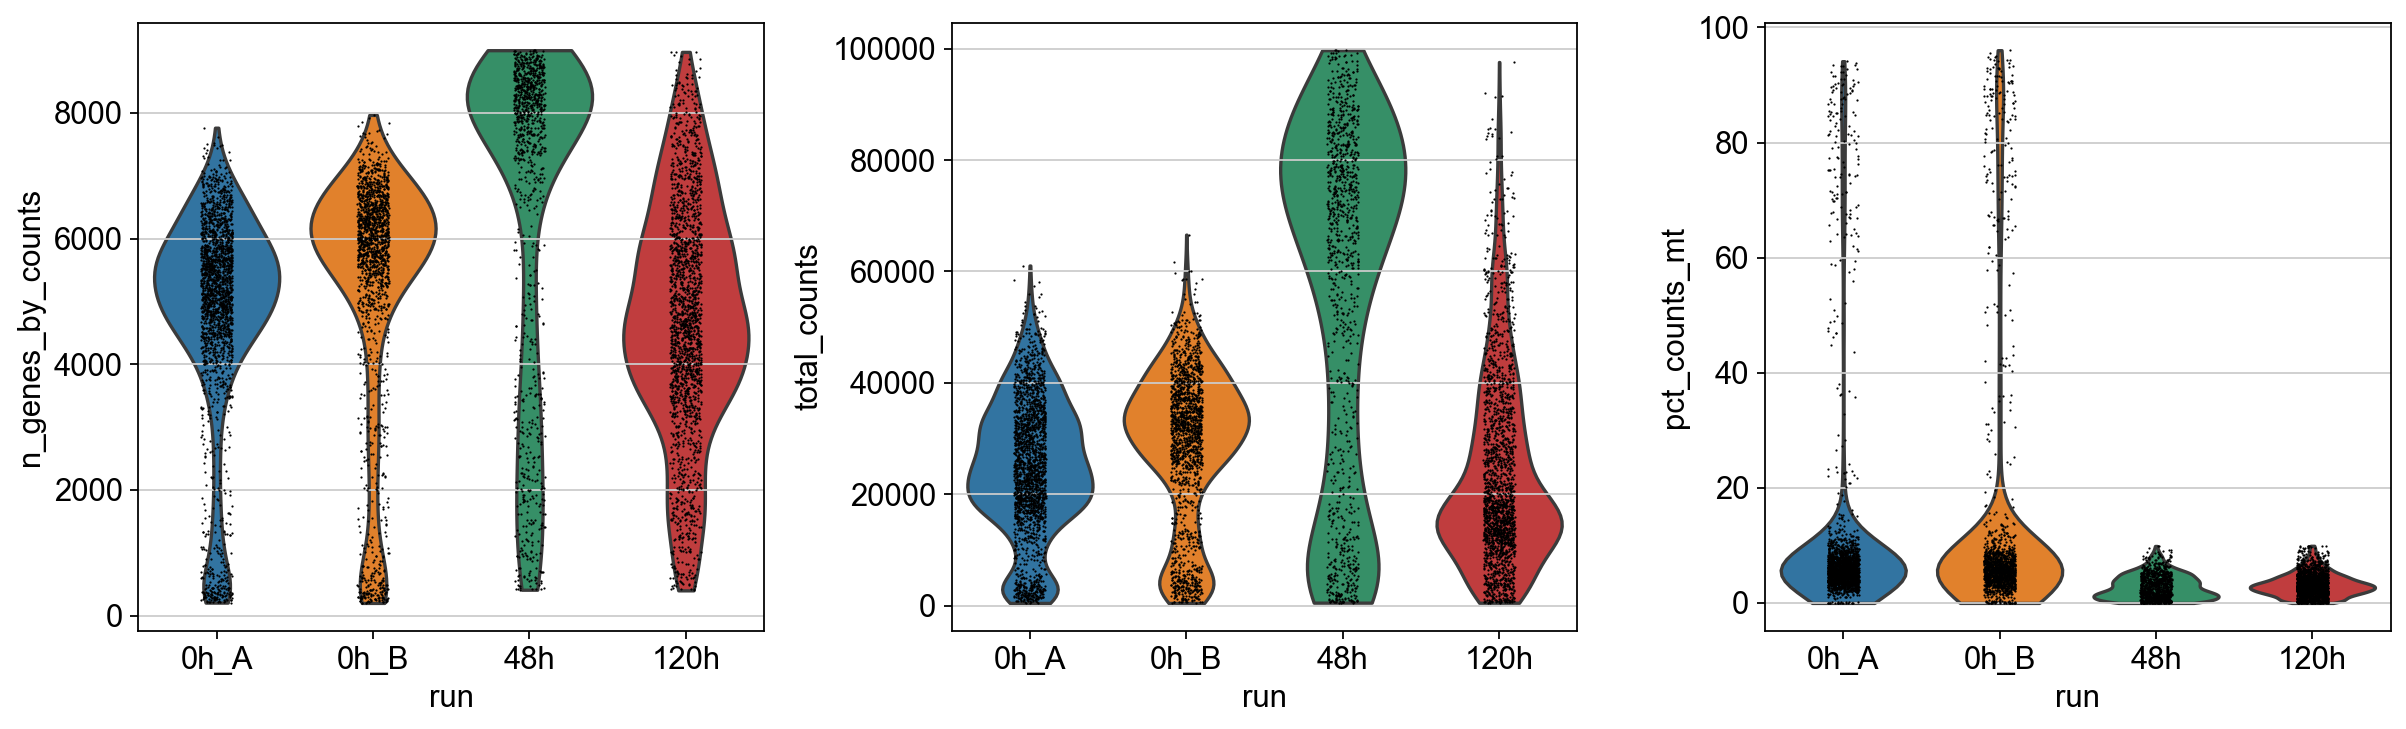

In [15]:
sc.pl.violin(adata, keys = ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], multi_panel=True, groupby='run')

***Figure X:** The violin plots show the values for n_genes_by_counts, total_count and ppct_counts_mt per run.*

### Total counts vs percentage of mitochondrial DNA
**Figure X** displays the total number of transcripts on the x-axis and the percentage of mitochondrial DNA on the y-axis. In cases where the mitochondrial DNA exceeds 10%, the RNA counts are below 20,000 and are from the runs where the differentiation time is 0 hours. High mitochondrial DNA levels are consistently observed in both runs where the differentiation time is zero. Table X confirms that mitochondrial DNA exceeds 10% in cases with zero differentiation time.

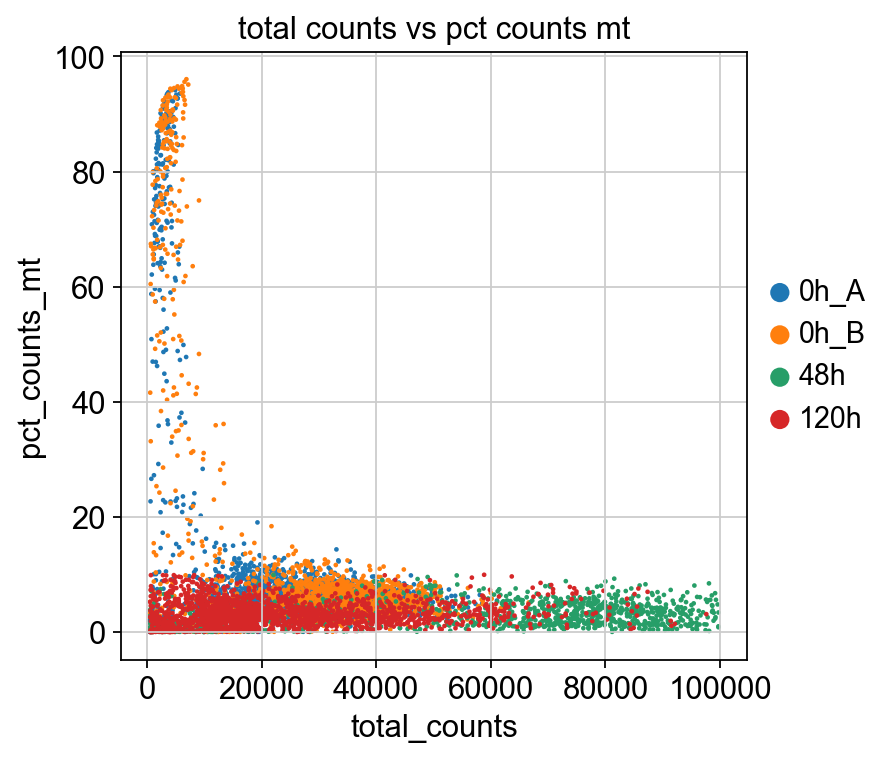

In [16]:
sc.pl.scatter(adata, "total_counts", "pct_counts_mt", title="total counts vs pct counts mt", color="run")

***Figure x:** The total counts plotted on the x-axis and the percentage of counts per million is plotted on the y-axis.*

In [17]:
total_values = data.groupby('run')['pct_counts_mt'].count()
data2 = data[data['pct_counts_mt'] > 10]
c2 = data2.groupby('run')['total_counts'].max()
count_values = data2.groupby('run')['pct_counts_mt'].count()
percentage_values = round((count_values / total_values) * 100, 2)
max_values = data.groupby('run')['pct_counts_mt'].max()

result_mt = pd.DataFrame({'Total': total_values, 'Total above 10 %': count_values, 'Percentage above 10 %': percentage_values, 'Max count of MT > 10 %': c2, 'Max Percentage': max_values})

***Table X:** Display of the total mitochondrial counts per batch, the percentage mitochondrial DNA exceeding 10% alongside the corresponding RNA count, and the maximum percentage of mitochondrial RNA count. The data confirms the consistent observation of elevated mitochondrial DNA levels above 10% with RNA counts below 45000 in runs with zero differentiation time.*

In [18]:
result_mt

,Total,Total above 10 %,Percentage above 10 %,Max count of MT > 10 %,Max Percentage
run,,,,,
0h_A,2110,290,13.74,36251.0,94.148613
0h_B,1649,279,16.92,44828.0,96.055687
48h,1050,0,0.00,NaN,9.898523
120h,1966,0,0.00,NaN,9.930489


### Total counts vs N genes by counts

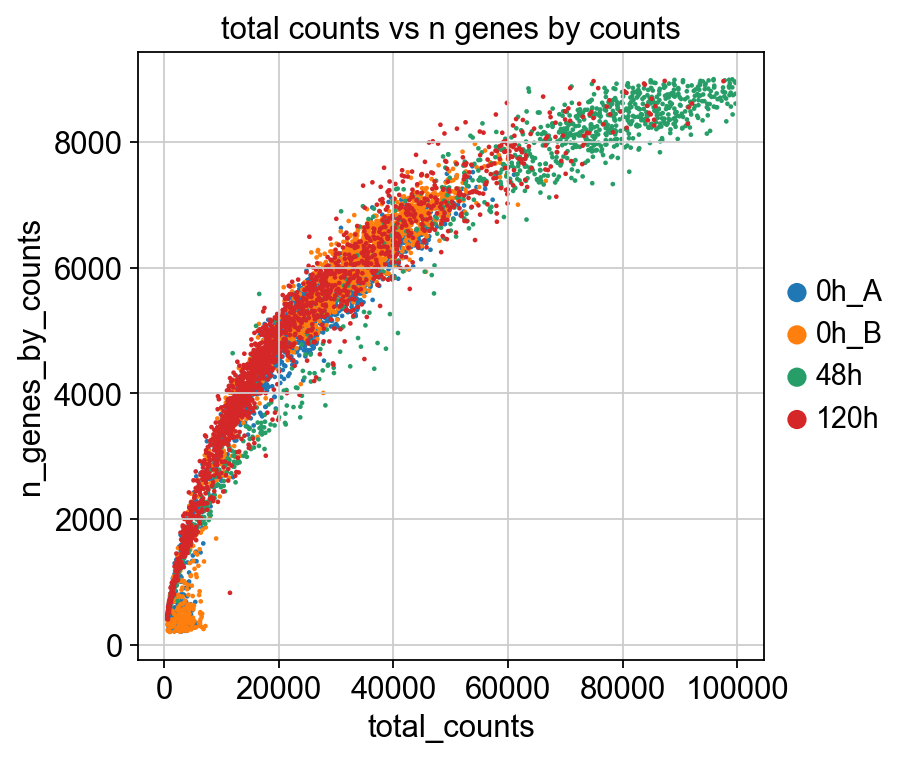

In [19]:
sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", title="total counts vs n genes by counts", color="run")

***Figure x:** The total counts plotted on the x-axis and the genes by counts on the y-axis.*

## Filtering data
The AnnData object is subsetted by filtering based on various parameters. Specifically, genes with a count between 2000 and 7000, a total count less than 100,000 and a percentage of mitochondrial DNA between 0,1 and 10.


In [20]:
subset_condition = (
    (adata.obs['n_genes_by_counts'] > 2000) &
    (adata.obs['n_genes_by_counts'] < 7000) &
    (adata.obs['n_counts'] < 100000) &
    (adata.obs['pct_counts_mt'] < 10) &
    (adata.obs['pct_counts_mt'] > 0.1)
)
adata = adata[subset_condition, :]

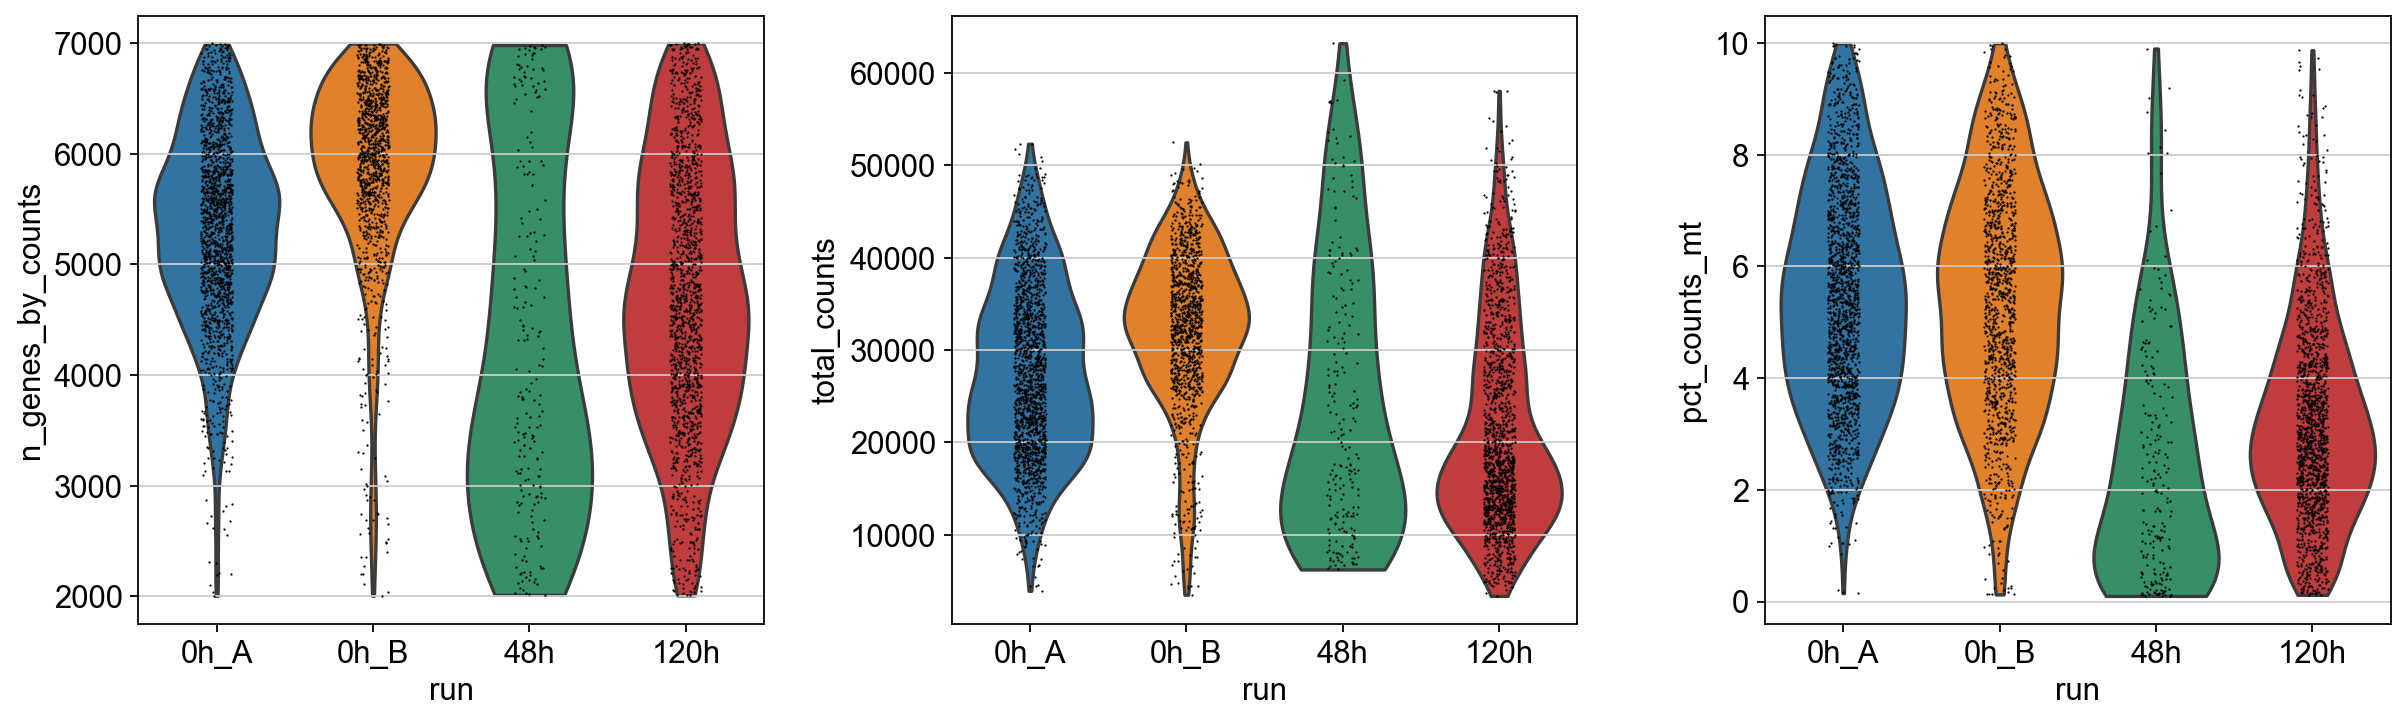

In [21]:
sc.pl.violin(
    adata,
    [
     'n_genes_by_counts',
     'total_counts',
     'pct_counts_mt'
     ],
    multi_panel=True,
     groupby='run'
)

In [22]:
counts = adata.obs['run'].value_counts()
counts

0h_A    1729
120h    1525
0h_B    1218
48h      222
Name: run, dtype: int64

## Normalization

In [23]:
adata.layers["counts"] = adata.X.copy()
sc.pp.normalize_total(adata, target_sum=1e5)
sc.pp.log1p(adata)
adata.raw = adata

In [30]:
sc.pp.highly_variable_genes(
    adata,
    n_top_genes=2000,
    flavor='seurat_v3',
)

sc.pp.highly_variable_genes(
    adata,
    n_top_genes=2000,
    subset=True,
    flavor='seurat_v3'
)

In [31]:
#sc.pp.combat(adata, key='batch')

## Training size
In this VAE, a training size of 0.9 is used, meaning the total data is multiplied by 0.9, resulting in training data. The training data is divided into batches with a batch size of 128. However, in this rare case, the remainder of all the batch sizes is 1; Therefore, the script adjusts the training with increments of 0.01 so the remainder is not one anymore. The model has a set amount of epochs, in this case, 100. For each epoch, it shuffles the training data and divides it into batches. Each time it feeds a batch into the model, it is called an iteration. So, there are N iterations for every epoch, where N is the number of batches, as seen in **Figure X**. 

In [1]:
training_size = 0.9
while np.ceil((len(adata) * training_size) % 128) == 1: training_size -= 0.01
print(f"Current training_size: {training_size}")

NameError: name 'np' is not defined

![alt text](static/training_size.png "Title")

***Figure X:** This is an example of how each epoch works. For every epoch, the training data is divided into batches of 128; these batches will be different for every epoch. Every time the batch is fed into the model, it is called an iteration. So, for every epoch, there are N iterations, where N the number of batches is.*

## Training model

In [37]:
scvi.model.SCVI.setup_anndata(adata, batch_key="batch")
scvi.model.SCVI.setup_anndata(adata, layer="counts", batch_key="batch")

scvi.model.SCVI.setup_anndata(adata)
model = scvi.model.SCVI(adata)
model.view_anndata_setup()

#model.train(batch_size = 128, train_size=training_size, max_epochs=100)
#model_dir = os.path.join(save_dir, "scvi_model")
#model.save(model_dir, overwrite=True)


Anndata setup with scvi-tools version 1.0.3.

Setup via `SCVI.setup_anndata` with arguments:

{
│   'layer': None,
│   'batch_key': None,
│   'labels_key': None,
│   'size_factor_key': None,
│   'categorical_covariate_keys': None,
│   'continuous_covariate_keys': None
}

         Summary Statistics         
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃     Summary Stat Key     ┃ Value ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│         n_batch          │   1   │
│         n_cells          │ 4694  │
│ n_extra_categorical_covs │   0   │
│ n_extra_continuous_covs  │   0   │
│         n_labels         │   1   │
│          n_vars          │ 23543 │
└──────────────────────────┴───────┘

               Data Registry                
┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Registry Key ┃    scvi-tools Location    ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│      X       │          adata.X          │
│    batch     │ adata.obs['_scvi_batch']  │
│    labels    │ adata.obs['_scvi_labels'] │
└──────────────┴───────────────────────────┘

                     batch State Registry                      
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃     Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_batch'] │     0      │          0          │
└──────────────────────────┴────────────┴─────────────────────┘

                     labels State Registry                      
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃      Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_labels'] │     0      │          0          │
└───────────────────────────┴────────────┴─────────────────────┘

In [38]:
t_model = scvi.model.SCVI.load("scvi_model/", adata=adata)

INFO     File scvi_model/model.pt already downloaded                                                               


ValueError: counts is not a valid key in adata.layers.

In [35]:
t_model

NameError: name 't_model' is not defined

In [ ]:
adata.obsm["X_scvi"] = t_model.get_latent_representation()
#adata.layers['scvi_normalized'] = t_model.get_normalized_expression(libray_size = 1e4)

In [ ]:
sc.pp.neighbors(adata, method='umap', use_rep="X_scvi")
sc.tl.umap(adata)
sc.pl.umap(
    adata,
    title="hiPSC",
    color=["batch", "run"],
    ncols=1
)

# Reference
Bibliography

1. OUP accepted manuscript. Briefings In Bioinformatics. Published online 2021. doi:https://doi.org/10.1093/bib/bbab473
2. Liu J, Fan Z, Zhao W, Zhou X. Machine Intelligence in Single-Cell Data Analysis: Advances and New Challenges. Frontiers in Genetics. 2021;12. doi:https://doi.org/10.3389/fgene.2021.655536
3. Seurat. Satijalab.org. Published 2019. https://satijalab.org/seurat/
4. Keras Autoencoder vs PCA: A Comparative Analysis for Data Scientists | Saturn Cloud Blog. saturncloud.io. Published July 10, 2023. Accessed September 14, 2023. https://saturncloud.io/blog/keras-autoencoder-vs-pca-a-comparative-analysis-for-data-scientists/
5. Rocca J. Understanding Variational Autoencoders (VAEs). Medium. Published March 15, 2020. https://towardsdatascience.com/understanding-variational-autoencoders-vaes-f70510919f73
6. GEO Accession viewer. www.ncbi.nlm.nih.gov. Accessed September 15, 2023. https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE214521
7. Seurat - Guided Clustering Tutorial. satijalab.org. https://satijalab.org/seurat/articles/pbmc3k_tutorial.html
8. scVI. Python. Accessed September 14, 2023. https://docs.scvi-tools.org/en/stable/user_guide/models/scvi.html
9.Lopez R, Regier J, Cole MB, Jordan MI, Yosef N. Deep generative modeling for single-cell transcriptomics. Nature Methods. 2018;15(12):1053-1058. doi:https://doi.org/10.1038/s41592-018-0229-2
10. Gayoso A, Lopez R, Xing G, et al. A Python library for probabilistic analysis of single-cell omics data. Nature Biotechnology. 2022;40(2):163-166. doi:https://doi.org/10.1038/s41587-021-01206-w
11. David S. Deep Learning: The Brain is Not a Prediction or Hallucination Machine. Bbntimes.com. Published 2022. Accessed September 15, 2023. https://www.bbntimes.com/technology/deep-learning-the-brain-is-not-a-prediction-or-hallucination-machine
‌